1. What values are returned during the following series of stack operations, if executed upon an initially empty stack?

push(5), push(3), pop(), push(2), push(8), pop(), pop(), push(9), push(1), pop(), push(7), push(6), pop(), pop(), push(4), pop(), pop().

### Answer:

3, 8, 2, 1, 6, 7, 4, 9

2. What values are returned during the following sequence of queue operations, if executed on an initially empty queue?

enqueue(5), enqueue(3), dequeue(), enqueue(2), enqueue(8), dequeue(), dequeue(), enqueue(9), enqueue(1), dequeue(), enqueue(7), enqueue(6), dequeue(), dequeue(), enqueue(4), dequeue(), dequeue().

### Answer:

5, 3, 2, 8, 9, 1, 7, 6

3. Postfix notation (also called Reverse Polish Notation) is an unambiguous way of writing an arithmetic expression without parentheses. It is defined so that if ```“(exp1) op (exp2)”``` is a normal, fully parenthesized infix expression whose operation is ```op```, the postfix version of this is ```“pexp1 pexp2 op”```, where ```pexp1``` is the postfix version of ```exp1``` and ```pexp2``` is the postfix version of ```exp2```. The postfix version of a single number or variable is just that number or variable. 

For example: 

Infix expression: $((5+2)∗(8−3))/4$

Postfix version: $5 ~2 ~+ ~8 ~3 ~− ~∗ ~4 ~/$ 

(a) Describe an algorithm that converts an infix expression to a postfix expression using one of the Linear ADTs. Include other operations such as exponent and square root functions. First convert the infix expression into its equivalent binary tree representation.


### Answer:

  1. Create a stack to hold operators.
  
  2. Create a list to hold the postfix expression.
  
  3. Convert the infix expression into a binary tree representation, the PEMDAS rules for order will be used.
  
  4. Traverse the binary tree using Depth-First Search (DFS) and perform these checks:
  
       a. If the node is an operand (number or variable), append it to the output list.
       
       b. If the node is an operator, pop operators off the stack and append them to the output list until an operator of lower precedence (or equal precedence with left associativity) or a left parenthesis is encountered. Then push the current operator onto the stack.
       
       c. If the node is a left parenthesis, push it onto the array.
       
       d. If the node is a right parenthesis, pop operators off the stack and append them to the output list until a left parenthesis is encountered. Discard both the left and right parenthesis.
       
  5. After all nodes have been processed, pop any remaining operators off the stack and append them to the list.
  
  6. Join the list to generate the postfix string.

### Answer:

(b) Implement your algorithm in (a) for an Infix to Postfix Converter. It should accept a string (infix expression) and return a string (postfix expression). Your code should reuse the module/s given in the package.

In [4]:
from package.array.array_stack import ArrayStack;

# Define operator precedence and associativity
precedence = {
    "^": (4, "right"),
    "sqrt": (4, "right"),
    "*": (3, "left"),
    "/": (3, "left"),
    "+": (2, "left"),
    "-": (2, "left"),
    "(": (1, "none"),
}

# Define operators and their corresponding functions
operators = ["+", "-", "*", "/", "^", "sqrt"]

# Convert infix expression to postfix expression
def infix_to_postfix(s : str) -> str:
    print("Infix:", s)
    # Convert expression to list of tokens

    # Create empty stack and output list
    operators_stack = []; 
    postfix_expression = []
    
    # For two digit or more 
    previous_is_number = False

    # Traverse tokens
    for c in s:
        # If token is an operand, append it to output
        if c.isnumeric():
            if (previous_is_number):
                postfix_expression[-1] = postfix_expression[-1] + c
            else:
                postfix_expression.append(c)
                previous_is_number = True
        else:
            previous_is_number = False
            # If token is an operator or function
            if c in operators:
                # Pop operators off stack and append to output until lower-precedence operator is encountered
                while operators_stack and operators_stack[-1] != "(" and (precedence[c][0] < precedence[operators_stack[-1]][0] or (precedence[c][0] == precedence[operators_stack[-1]][0] and precedence[c][1] == "left")):
                    postfix_expression.append(operators_stack.pop())
                # Push token onto stack
                operators_stack.append(c)
            # If token is left parenthesis, push it onto stack
            elif c == "(":
                operators_stack.append(c)
            # If token is right parenthesis, pop operators off stack and append to output until left parenthesis is encountered
            elif c == ")":
                while operators_stack[-1] != "(":
                    postfix_expression.append(operators_stack.pop())
                operators_stack.pop()  # Discard left parenthesis

    # Pop any remaining operators off stack and append to output
    while operators_stack:
        postfix_expression.append(operators_stack.pop())

    # Join output list into space-separated string and return
    postfix = " ".join(postfix_expression)
    return postfix


In [6]:
# Example

print("Postfix", infix_to_postfix("2*20/2+(3+4)*3^2-6+15"))

Infix: 2*20/2+(3+4)*3^2-6+15
Postfix 2 20 * 2 / 3 4 + 3 2 ^ * + 6 - 15 +


(c) Describe a nonrecursive way of evaluating a postfix expression using one of the linear ADTs discussed this week.

### Answer 

A non-recursive way of evaluating a postfix expression is to use the ArrayStack ADT.

1. Traverse the postfix expression from left to right, one token at a time.
1. Loop through the postfix expression from left to right, one item at a time.
2. If the item is an operand, push it onto the stack.
3. If the item is an operator, pop the top two operands from the stack, apply the operator to them, and push the result back onto the stack.
4. Once all items have been processed, the final result will be at the top of the stack.

###Answer:

(d) Implement your  algorithm in (c) for a Postfix Expression. It should accept a string (postfix expression) and return a float (result).

Your code should reuse the module(s) in the package given to you.

In [9]:
from package.array.array_stack import ArrayStack;

# Define operators and their corresponding functions
import operator

# Define operators and their corresponding functions
operators = {
    "+": operator.add,
    "-": operator.sub,
    "*": operator.mul,
    "/": operator.truediv,
    "^": operator.pow,
    "sqrt": operator.pow,
}

def postfix_calculator(s: str) -> float:
    # Convert expression to list of tokens
    items = s.split()

    # Create empty stack
    stack = ArrayStack()

    # Traverse tokens
    for item in items:
        # If token is an operand, push it onto stack
        if item.isnumeric():
            stack.push(int(item))
        # If token is an operator, pop top two operands from stack, apply operator, and push result onto stack
        elif item in operators:
            operand2 = stack.pop()
            operand1 = stack.pop()
            result = operators[item](operand1, operand2)
            if (item == "sqrt"):
                result = operators[item](operand1, 1/2)

            stack.push(result)
        # If token is a function, pop top operand from stack, apply function, and push result onto stack
        elif item == "sqrt":
            operand = stack.pop()
            result = operators[item](operand)
            stack.push(result)

    # Final result is at top of stack
    return(float(stack.pop()))

postfix = "2 20 * 2 / 3 4 + 3 2 ^ * + 6 - 15 +"
print("Postfix:", postfix)
print("Result:", postfix_calculator(postfix))

Postfix: 2 20 * 2 / 3 4 + 3 2 ^ * + 6 - 15 +
Result: 92.0


4. Consider a queue-like data structure that supports insertion and deletion at both the front and the back of the queue. Such a structure is called a double-ended queue, or deque, which is usually pronounced "deck" to avoid confusion with the ```dequeue``` method of the regular queue ADT, which is pronounced like the abbreviation "D.Q."

The Deque ADT is more general than both the stack and the queue ADTs. The extra generality can be useful in some applications. For example, we describe a restaurant using a queue to maintain a waitlist. Occassionally, the first person might be removed from the queue only to find that a table was not available; typically, the restaurant will re-insert the person at the first position in the queue. It may also be that a customer at the end of the queue may grow impatient and leave the restaurant. (Note that We will need an even more general data structure if we want to model customers leaving the queue from other positions.)

The Deque ADT has the following methods:

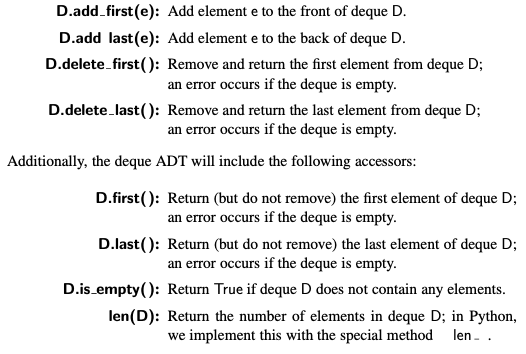

The following table shows a series of operations and their effects on an initially empty deque $D$ of integers.

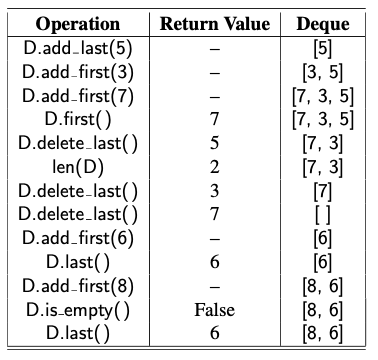


a) Implement that Deque ADT in much the same way as the ArrayQueue class in the given package.

In [11]:

class ArrayDeque:
    """Deque implementation using a Python list as underlying storage."""

    def __init__(self):
        """Create an empty deque."""
        self._data = []
    
    def add_first(self, e):
        self._data = [e] + self._data
        
    def add_last(self, e):
        self._data.append(e)
        
    def delete_first(self):
        value = self._data[0]
        self._data = self._data[1:]
        return value
        
    def delete_last(self):
        value = self._data[-1]
        self._data = self._data[:-1]
        return value
        
    def first(self):
        if self.is_empty():
            raise "Deque is empty"
        return self._data[0]
    
    def last(self):
        if self.is_empty():
            raise "Deque is empty"
        return self._data[-1]

    def is_empty(self):
        """Return True if the queue is empty."""
        return len(self._data) == 0

    def __len__(self):
        """Return the number of elements in the queue."""
        return len(self._data)
    
    def __str__(self):
        return str(self._data)
    

Command 		|		 Return 		|		 Deque
D.add_last(5) 		|		 None 		|		 [5]
D.add_first(3) 		|		 None 		|		 [3, 5]
D.add_first(7) 		|		 None 		|		 [7, 3, 5]
D.first() 		|		 7 		|		 [7, 3, 5]
D.delete_last() 		|		 5 		|		 [7, 3]
len(D) 		|		 2 		|		 [7, 3]
D.delete_last() 		|		 3 		|		 [7]
D.delete_last() 		|		 7 		|		 []
D.add_first(6) 		|		 None 		|		 [6]
D.last() 		|		 6 		|		 [6]
D.add_first(8) 		|		 None 		|		 [8, 6]
D.is_empty() 		|		 False 		|		 [8, 6]
D.last() 		|		 6 		|		 [8, 6]


(b) Running your code, what values are returned during the following sequence of deque ADT operation, on an initially empty deque, D? 

D.is_empty(),
D.add_first(4),
D.add_last(8),
D.add_last(9),
D.add_first(5),
len(D),
D.delete_first(),
D.delete_last(),
D.add_last(7),
D.first(),
D.last(),
D.add_last(6),
D.delete_first(),
D.delete_first(),
D.is_empty(), 
len(D), 
print(D)

Note: For the print() method, you have to implement the __str__ method in the deque class such that it shows the contents of the deque as shown in the table above.

In [13]:
D = ArrayDeque()
print(D.is_empty())
print(D.add_first(4))
print(D.add_last(8))
print(D.add_last(9))
print(D.add_first(5))
print(len(D))
print(D.delete_first())
print(D.delete_last())
print(D.add_last(7))
print(D.first())
print(D.last())
print(D.add_last(6))
print(D.delete_first())
print(D.delete_first())
print(D.is_empty())
print(len(D))
print(D)    

True
None
None
None
None
4
5
9
None
4
7
None
4
8
False
2
[7, 6]
